In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

# 0. Dataset Analysis

In [29]:
gyeongbu_data = pd.read_excel('datasets/Gyeongbu_HSR.xlsx')
gyeongbu_data.head()

,Train,Number,Departure Time,Arrival Time,Travel Time (Hours),Stops,Cost (Korean Won),Cost (US Dollars),Additional Information
0,KTX,1,05:13:00,07:49:00,02:36:00,"Gwangmyeong, Daejeon, Dongdaegu, Gyeongju, Uls...",59800,44.252,HSR ONLY
1,KTX,3,05:28:00,08:15:00,02:47:00,"Gwangmyeong, Cheonan-Asan, Daejeon, Gimcheon-G...",59800,44.252,HSR ONLY
2,KTX,5,05:58:00,08:42:00,02:44:00,"Gwangmyeong, Cheonan-Asan, Daejeon, Seodaegu, ...",59400,43.956,Seodaegu
3,KTX-Sancheon,75,06:03:00,08:48:00,02:45:00,"Gwangmyeong, Cheonan-Asan, Osong, Daejeon, Gim...",59800,44.252,HSR ONLY
4,KTX,7,06:33:00,09:21:00,02:48:00,"Gwangmyeong, Osong, Daejeon, Gimcheon-Gumi, Do...",59800,44.252,HSR ONLY


In [30]:
honam_data = pd.read_excel('datasets/Honam_HSR.xlsx')
honam_data.head()

,Train,Number,Departure Time,Arrival Time,Travel Time (Hours),Stops,Cost (Korean Won),Cost (US Dollars),Additional Information,Virtual Departure Time
0,KTX-Sancheon,401,05:08:00,07:06:00,01:58:00,"Gwangmyeong, Osong, Gongju, Iksan, Jeongeup",42100,31.154,HSR ONLY,NaN
1,KTX-Sancheon,403,05:48:00,07:45:00,01:57:00,"Gwangmyeong, Cheonan-Asan, Osong, Iksan, Jeongeup",42100,31.154,HSR ONLY,NaN
2,KTX,405,06:29:00,08:27:00,01:58:00,"Gwangmyeong, Osong, Gongju, Iksan, Jeongeup",46800,34.632,"HSR ONLY, From Seoul",NaN
3,KTX,441,07:38:00,09:24:00,01:46:00,"Gwangmyeong, Osong, Iksan",46800,34.632,HSR ONLY,NaN
4,KTX-Sancheon,407,07:47:00,09:41:00,01:54:00,"Gwangmyeong, Gongju, Iksan, Jeongeup",46800,34.632,"HSR ONLY, From Seoul",NaN


In [31]:
def convert_to_hours(time_obj):
    # Extract hours and minutes
    hours = time_obj.hour
    minutes = time_obj.minute
    # Convert to total hours
    total_hours = hours + minutes / 60.0
    return round(total_hours,2)

In [32]:
# Apply the conversion function to the 'Travel Time' column and create a new column for hours
gyeongbu_data['Travel Time (Hours)'] = gyeongbu_data['Travel Time (Hours)'].apply(convert_to_hours)
honam_data['Travel Time (Hours)'] = honam_data['Travel Time (Hours)'].apply(convert_to_hours)

In [33]:
gyeongbu_data['ID'] = range(1, len(gyeongbu_data) + 1)
honam_data['ID'] = range(1, len(honam_data) + 1)

In [34]:
gyeongbu_data.head()

,Train,Number,Departure Time,Arrival Time,Travel Time (Hours),Stops,Cost (Korean Won),Cost (US Dollars),Additional Information,ID
0,KTX,1,05:13:00,07:49:00,2.60,"Gwangmyeong, Daejeon, Dongdaegu, Gyeongju, Uls...",59800,44.252,HSR ONLY,1
1,KTX,3,05:28:00,08:15:00,2.78,"Gwangmyeong, Cheonan-Asan, Daejeon, Gimcheon-G...",59800,44.252,HSR ONLY,2
2,KTX,5,05:58:00,08:42:00,2.73,"Gwangmyeong, Cheonan-Asan, Daejeon, Seodaegu, ...",59400,43.956,Seodaegu,3
3,KTX-Sancheon,75,06:03:00,08:48:00,2.75,"Gwangmyeong, Cheonan-Asan, Osong, Daejeon, Gim...",59800,44.252,HSR ONLY,4
4,KTX,7,06:33:00,09:21:00,2.80,"Gwangmyeong, Osong, Daejeon, Gimcheon-Gumi, Do...",59800,44.252,HSR ONLY,5


In [35]:
honam_data.head()

,Train,Number,Departure Time,Arrival Time,Travel Time (Hours),Stops,Cost (Korean Won),Cost (US Dollars),Additional Information,Virtual Departure Time,ID
0,KTX-Sancheon,401,05:08:00,07:06:00,1.97,"Gwangmyeong, Osong, Gongju, Iksan, Jeongeup",42100,31.154,HSR ONLY,NaN,1
1,KTX-Sancheon,403,05:48:00,07:45:00,1.95,"Gwangmyeong, Cheonan-Asan, Osong, Iksan, Jeongeup",42100,31.154,HSR ONLY,NaN,2
2,KTX,405,06:29:00,08:27:00,1.97,"Gwangmyeong, Osong, Gongju, Iksan, Jeongeup",46800,34.632,"HSR ONLY, From Seoul",NaN,3
3,KTX,441,07:38:00,09:24:00,1.77,"Gwangmyeong, Osong, Iksan",46800,34.632,HSR ONLY,NaN,4
4,KTX-Sancheon,407,07:47:00,09:41:00,1.90,"Gwangmyeong, Gongju, Iksan, Jeongeup",46800,34.632,"HSR ONLY, From Seoul",NaN,5


In [36]:
def determine_color(travel_time):
    if travel_time > 3:
        return 'red'
    elif travel_time > 2.4:
        return 'orange'
    else:
        return 'skyblue'

# Apply the function to create a color list
gyeongbu_data['Color'] = gyeongbu_data['Travel Time (Hours)'].apply(determine_color)
honam_data['Color'] = honam_data['Travel Time (Hours)'].apply(determine_color)

In [37]:
def plot_travel_time(data,line):
    plt.figure(figsize=(20, 6))
    plt.bar(data['ID'], data['Travel Time (Hours)'], color='skyblue')
    plt.xlabel('Train ID')
    plt.ylabel('Travel Time (Hours)')
    plt.title('Travel Time (Hours) for Each Train')
    plt.xticks(rotation=90)  # Rotate the x labels if there are many trains
    plt.savefig('figures/KTX_'+line+'_Travel_Time_Trains.png')
    plt.show()

    plt.figure(figsize=(20, 6))
    plt.bar(data['ID'], data['Travel Time (Hours)'], color=data['Color'])
    plt.xlabel('Train ID')
    plt.ylabel('Travel Time (Hours)')
    plt.title('Travel Time (Hours) for Each Train')
    plt.xticks(rotation=90)  # Use original Train IDs as labels
    plt.savefig('figures/KTX_'+line+'_Travel_Time_Trains_Modified.png')
    plt.show()


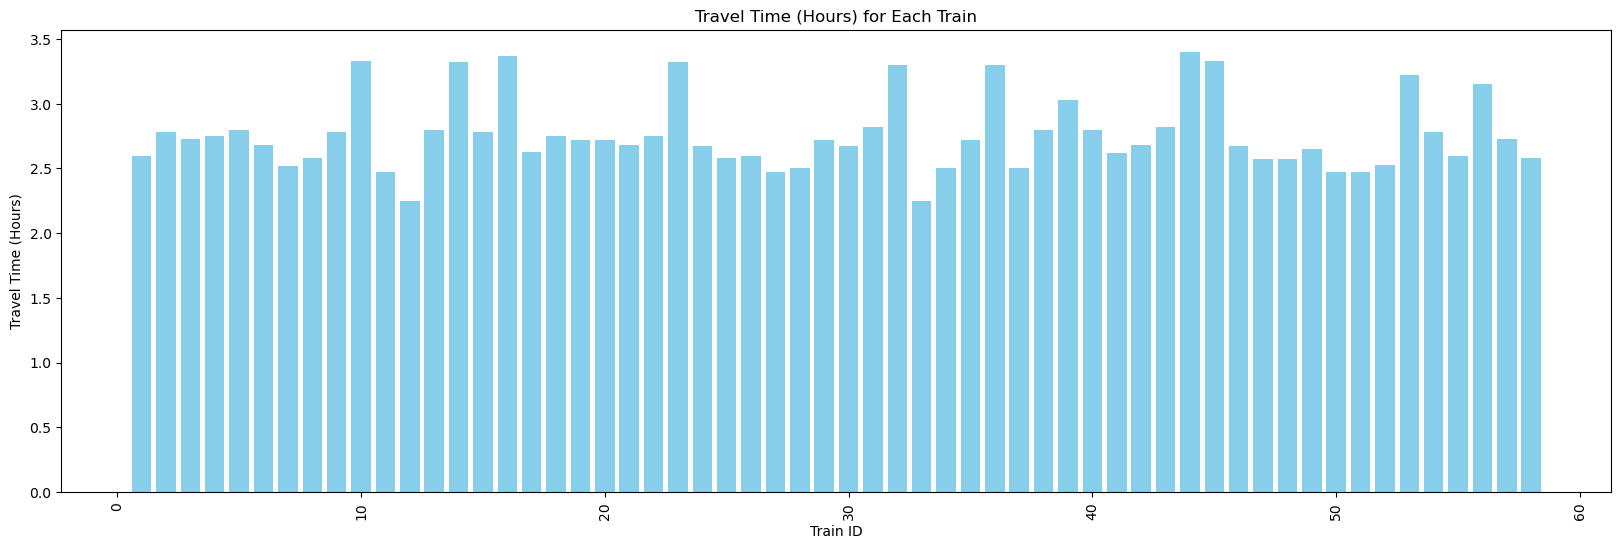

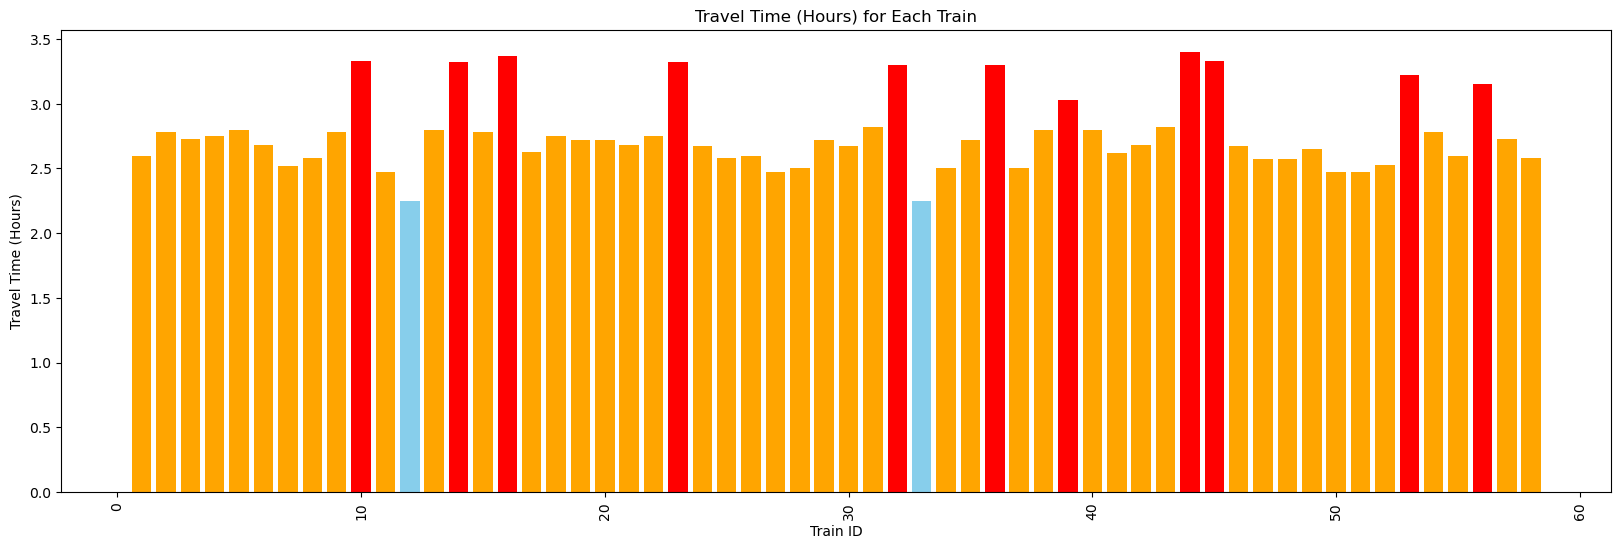

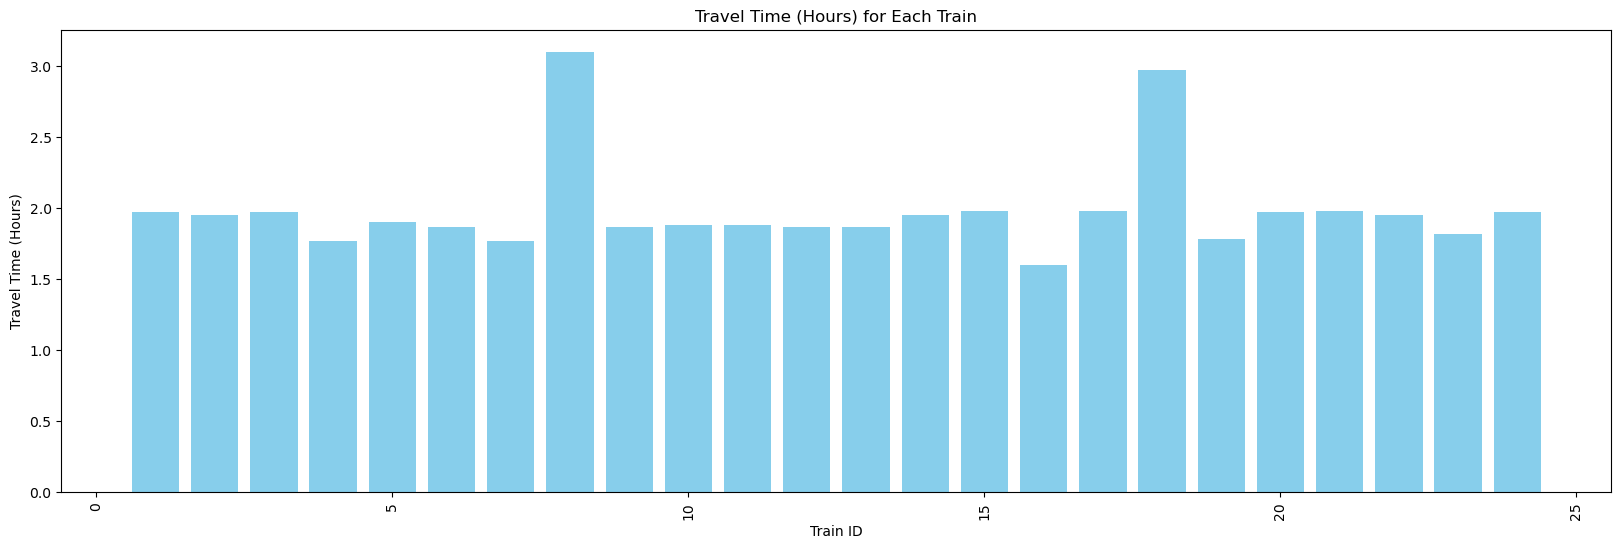

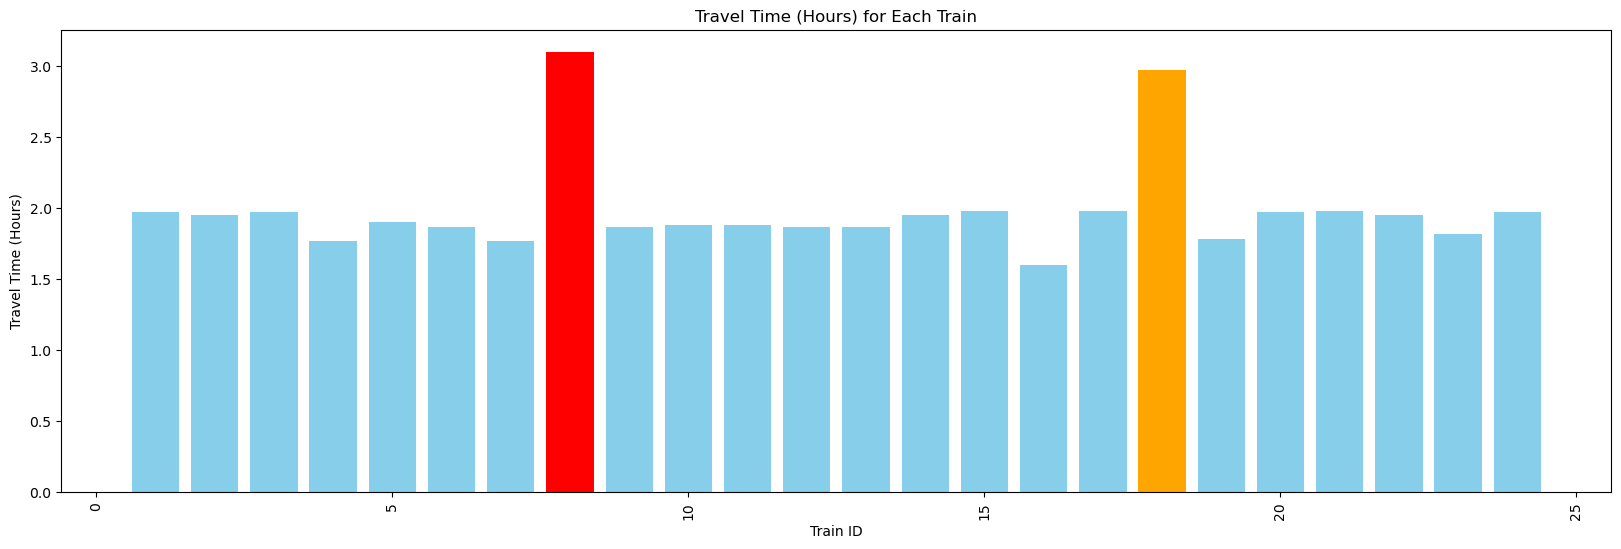

In [38]:
plot_travel_time(gyeongbu_data,'Gyeongbu')
plot_travel_time(honam_data,'Honam')

In [39]:
def duration_analysis(data,line):
    durations = [1.40, 1.50, 1.60, 1.70,1.80,1.90,2.00,2.10, 2.20,2.30,2.40,2.50,2.60,2.70,2.80,2.90,3.00,3.10,3.20,3.30,3.40, 3.50]
    train_num = []

    for dur in durations:
        temp = len(data[data['Travel Time (Hours)'] <= dur]) 
        train_num.append(temp)
    
    plt.figure(figsize=(12,6))
    plt.bar(durations,train_num)
    plt.xlabel('Travel Time (Hours) Threshold')
    plt.ylabel('Number of Trains on the '+line)
    plt.title('Travel Time (Hours) for Each Train')
    plt.savefig('figures/KTX_'+line+'_Travel_Time_Trains_Threshold.png')
    plt.show()
    

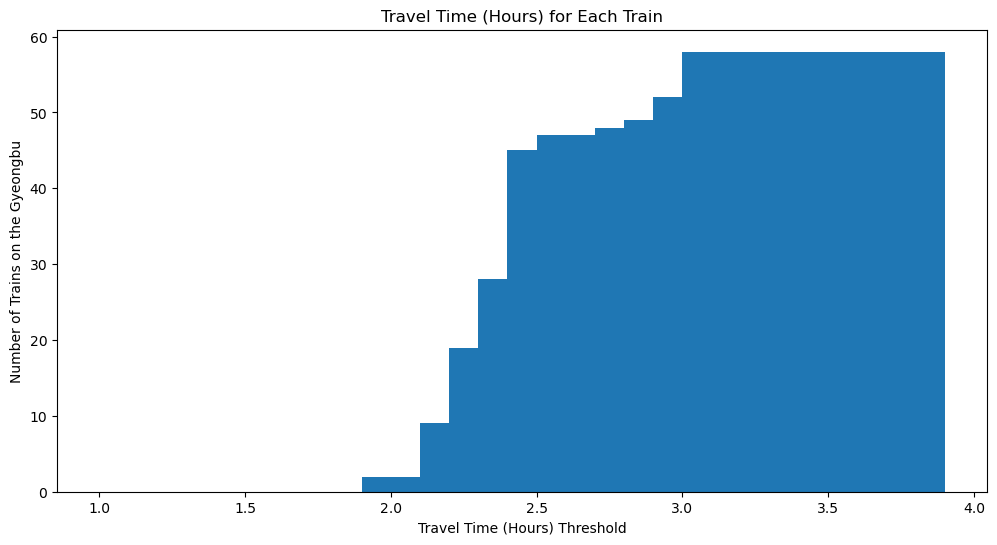

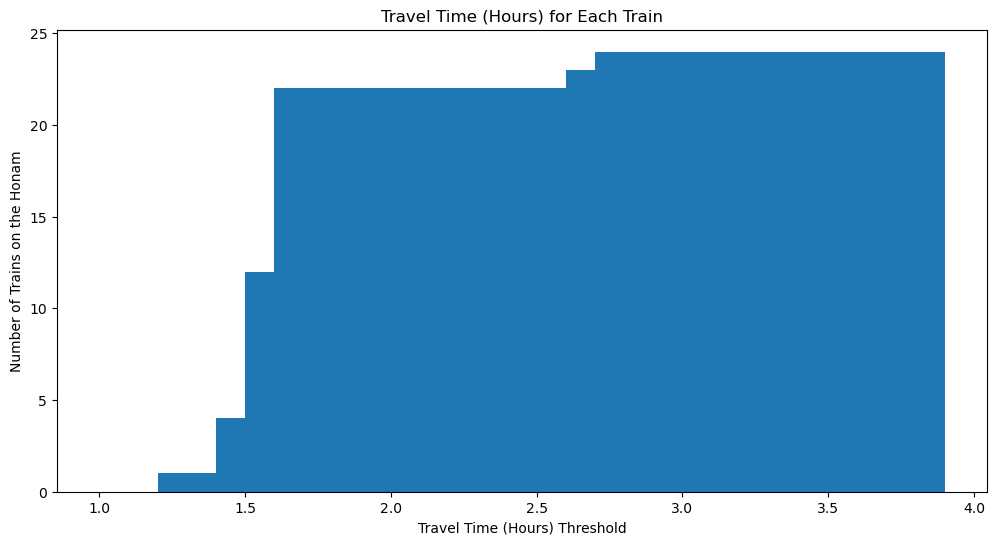

In [40]:
duration_analysis(gyeongbu_data,'Gyeongbu')
duration_analysis(honam_data,'Honam')

# Cost Analysis

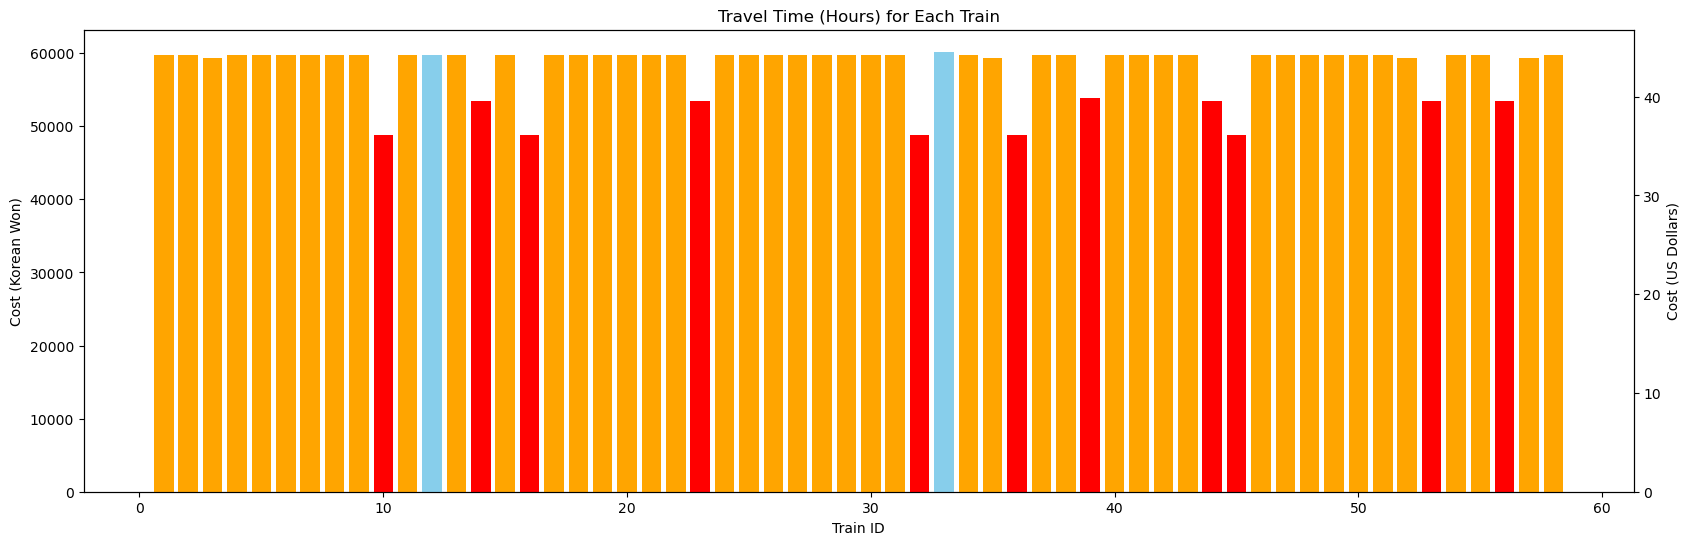

Average KTX Gyeongbu ticket cost is 58187.0 Korean Won or 43.06 US Dollars.


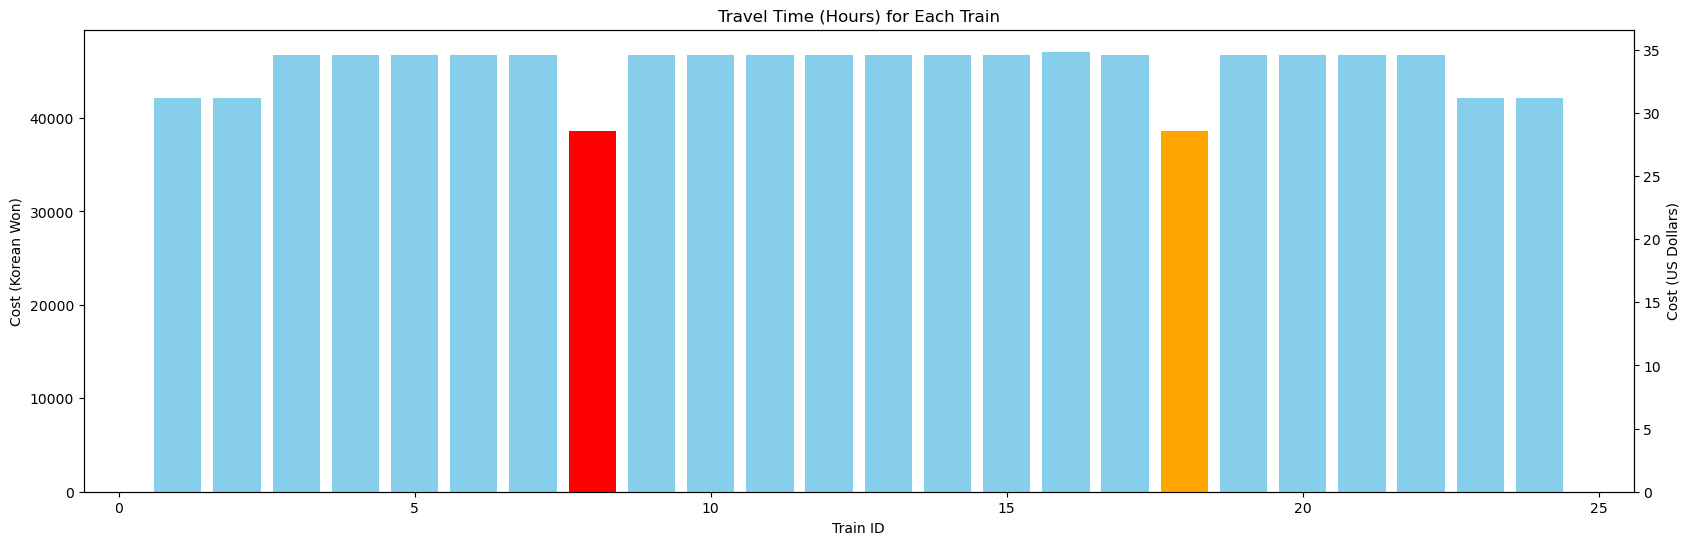

Average KTX Honam ticket cost is 45346.0 Korean Won or 33.56 US Dollars.


In [41]:
def cost_visualization(data,line):
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Plotting the Korean Won cost on the left y-axis
    ax1.bar(data['ID'], data['Cost (Korean Won)'], color=data['Color'], label='Cost (Korean Won)')
    ax1.set_xlabel('Train ID')
    ax1.set_ylabel('Cost (Korean Won)')
    ax1.tick_params(axis='y')

    # Create a second y-axis for the US Dollar cost
    ax2 = ax1.twinx()
    ax2.bar(data['ID'], data['Cost (US Dollars)'], color=data['Color'], alpha=0.6, label='Cost (US Dollars)')
    ax2.set_ylabel('Cost (US Dollars)')
    ax2.tick_params(axis='y')

    # Setting the title and rotating x-axis labels
    plt.title('Travel Time (Hours) for Each Train')
    plt.xticks(rotation=90)

    # Saving the figure
    plt.savefig('figures/KTX_'+line+'_Ticket_Cost.png')
    plt.show()

    average_cost_won = np.ceil(np.mean(data['Cost (Korean Won)']))
    average_cost_dollars = np.round(np.mean(data['Cost (US Dollars)']),2)
    print('Average KTX '+ line +f' ticket cost is {average_cost_won} Korean Won or {average_cost_dollars} US Dollars.')



cost_visualization(gyeongbu_data,'Gyeongbu')
cost_visualization(honam_data,'Honam')

# 1. K-means Clustering

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [43]:
gyeongbu_data.keys()

Index(['Train', 'Number', 'Departure Time', 'Arrival Time',
       'Travel Time (Hours)', 'Stops', 'Cost (Korean Won)',
       'Cost (US Dollars)', 'Additional Information', 'ID', 'Color'],
      dtype='object')

In [44]:
# Prepare the data for clustering
k_means_data = gyeongbu_data[['ID', 'Travel Time (Hours)']].values

# Standardize the data
scaler = StandardScaler()
k_means_data_scaled = scaler.fit_transform(k_means_data)

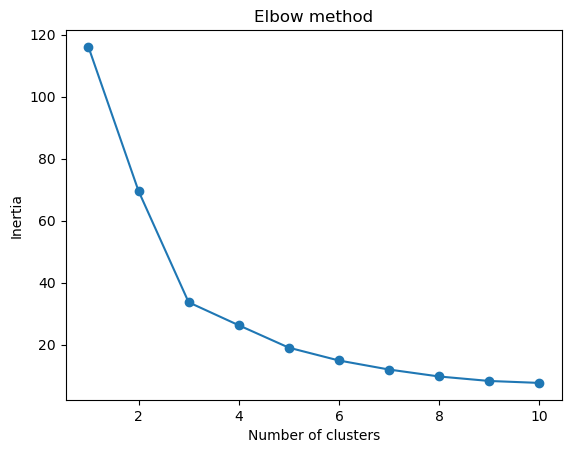

In [45]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_means_data_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [46]:
# Fit K-means with the optimal number of clusters
k = 3  # Use the optimal number of clusters determined from the Elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(k_means_data_scaled) 

KMeans(n_clusters=3, random_state=42)

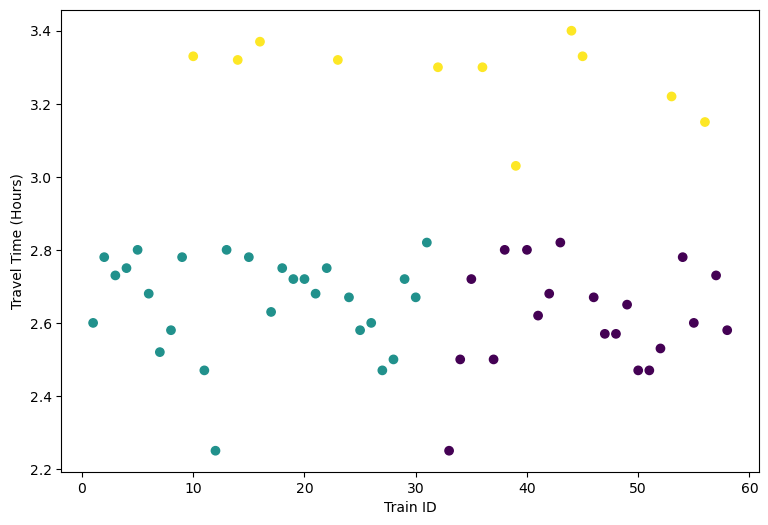

In [47]:
# Visualize the clusters using the standardized data as a reference
plt.figure(figsize=(9, 6))
plt.scatter(k_means_data[:, 0], k_means_data[:, 1], c=kmeans.labels_ ) 
plt.xlabel('Train ID')
plt.ylabel('Travel Time (Hours)')
plt.savefig('figures/KTX_Gyeongbu_Kmeans_cluster_results.png')
plt.show()

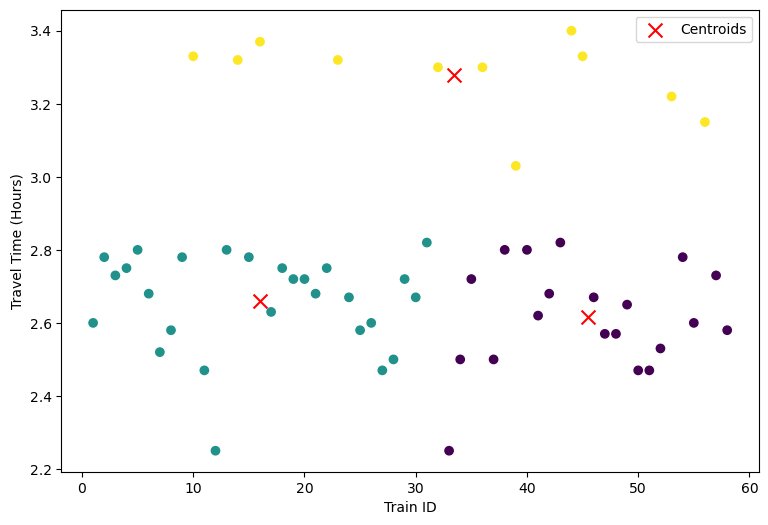

In [48]:
# Get the centroids
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

# Visualize the clusters with centroids
plt.figure(figsize=(9, 6))
plt.scatter(k_means_data[:, 0], k_means_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids') 
plt.xlabel('Train ID')
plt.ylabel('Travel Time (Hours)')
plt.legend()
plt.savefig('figures/KTX_Gyeongbu_Kmeans_centroid_results.png')
plt.show()

In [49]:
# Prepare the data for clustering
k_means_data = honam_data[['ID', 'Travel Time (Hours)']].values

# Standardize the data
scaler = StandardScaler()
k_means_data_scaled = scaler.fit_transform(k_means_data)

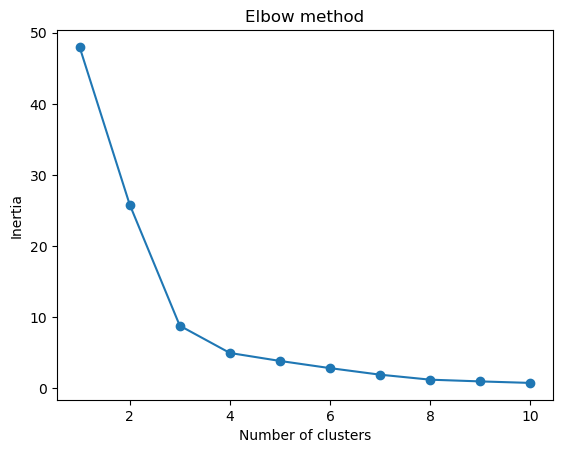

In [50]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_means_data_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

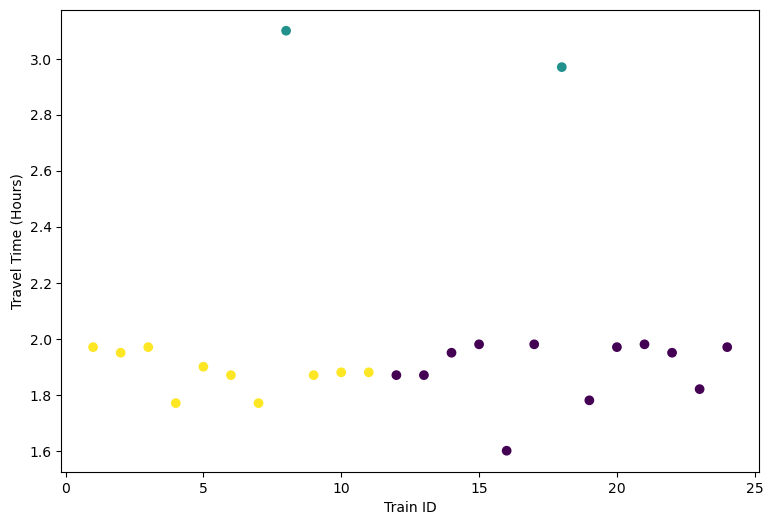

In [51]:
# Fit K-means with the optimal number of clusters
k = 3  # Use the optimal number of clusters determined from the Elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(k_means_data_scaled)

# Visualize the clusters using the standardized data as a reference
plt.figure(figsize=(9, 6))
plt.scatter(k_means_data[:, 0], k_means_data[:, 1], c=kmeans.labels_) 
plt.xlabel('Train ID')
plt.ylabel('Travel Time (Hours)')
plt.savefig('figures/KTX_Honam_Kmeans_cluster_results.png')
plt.show()

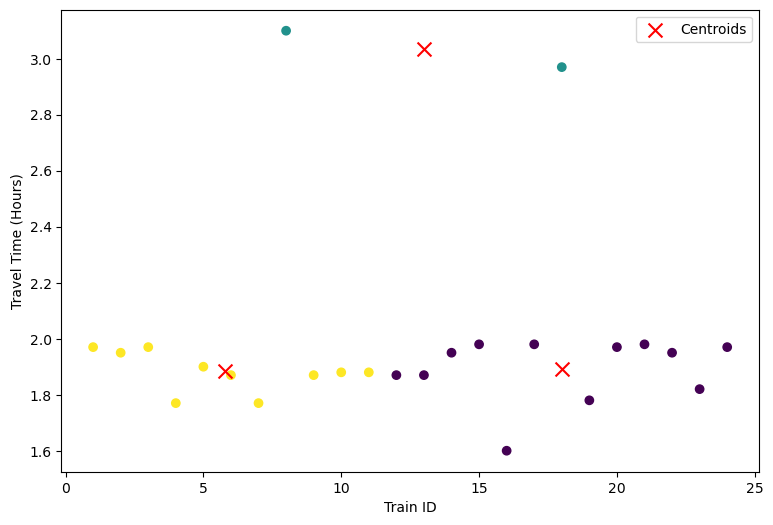

In [52]:
# Get the centroids
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

# Visualize the clusters with centroids
plt.figure(figsize=(9, 6))
plt.scatter(k_means_data[:, 0], k_means_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids') 
plt.xlabel('Train ID')
plt.ylabel('Travel Time (Hours)')
plt.legend()
plt.savefig('figures/KTX_Honam_Kmeans_centroid_results.png')
plt.show()

# 2. Principal Component Analysis

In [53]:
from sklearn.decomposition import PCA

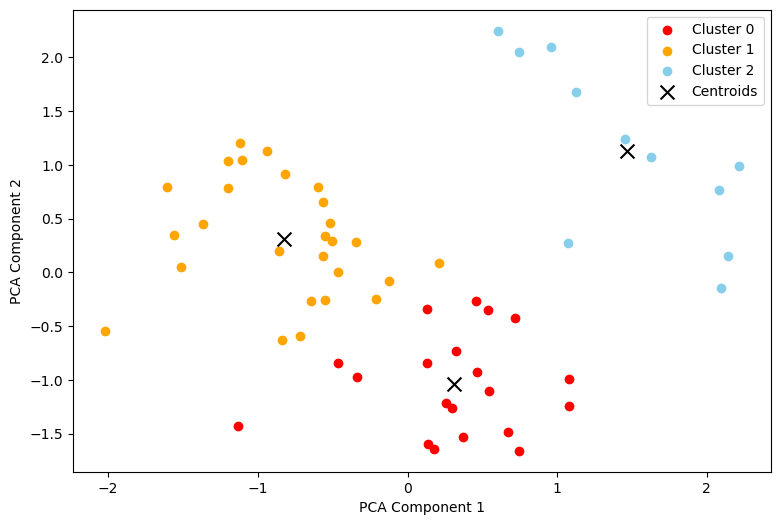

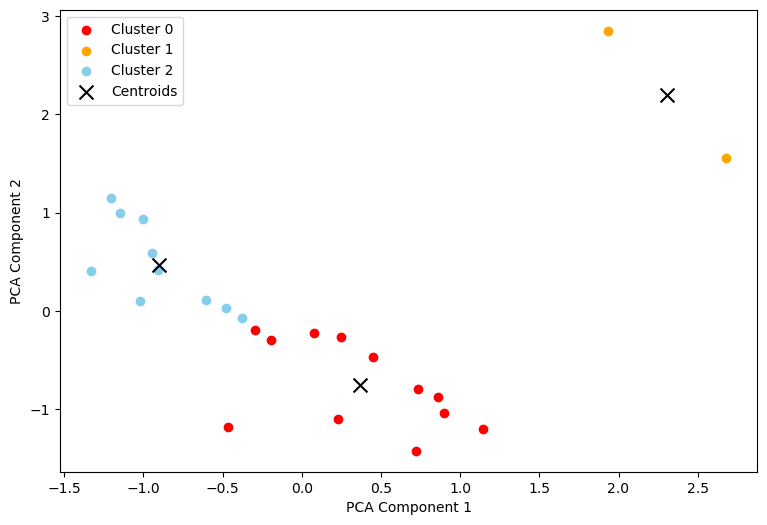

In [54]:
# Standardize the data
for line, data in zip(['Gyeongbu', 'Honam'],[gyeongbu_data, honam_data]):
    k_means_data = data[['ID', 'Travel Time (Hours)']].values
    scaler = StandardScaler()
    k_means_data_scaled = scaler.fit_transform(k_means_data)

    # Apply PCA
    pca = PCA(n_components=2)
    k_means_data_pca = pca.fit_transform(k_means_data_scaled)

    # Fit K-means with the optimal number of clusters
    k = 3  # Use the optimal number of clusters determined from the Elbow method
    kmeans = KMeans(n_clusters=k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(k_means_data_pca)

    # Visualize the clusters with PCA components
    plt.figure(figsize=(9, 6))
    colors = ['red', 'orange', 'skyblue']
    for cluster in range(k):
        cluster_data = data[data['Cluster'] == cluster]
        plt.scatter(k_means_data_pca[cluster_data.index, 0], k_means_data_pca[cluster_data.index, 1], 
                    color=colors[cluster], label=f'Cluster {cluster}')
    # Plot centroids
    centroids_pca = kmeans.cluster_centers_
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', marker='x', s=100, label='Centroids')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2') 
    plt.legend()
    plt.savefig('KTX_'+line+'_PCA.png')
    plt.show()